In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import keras
import math

11490434/11490434 [==============================] - 1s 0us/step


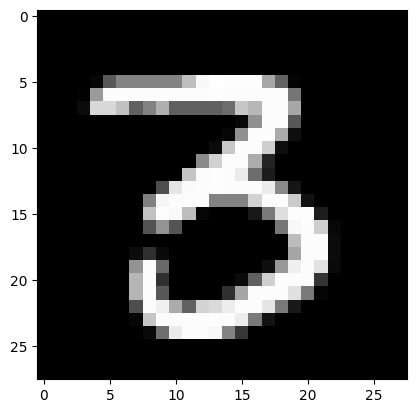

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
idx=np.random.randint(0,60000)
image=x_train[idx]
plt.imshow(image, cmap='gray')

In [7]:
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image

def fft(image):
  return np.fft.fft2(image)

def invfft(image):
  return np.fft.ifft2(image)


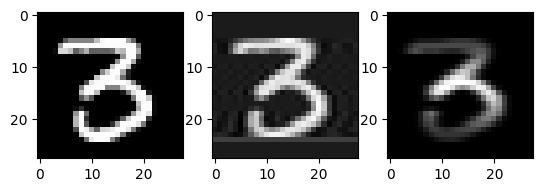

In [8]:
#ideal low pass
def ideal_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
    s3=s2*huv
    s4=np.fft.ifft(s3).real
    s5=center_img(s4)
    return s5

#gaussian low pass
def gauss_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))
    s3=s2*huv
    s4=np.fft.ifft(s3)
    s5=np.array([elem.real for elem in np.fft.ifft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

g_lp_filter_img = gauss_lp_filter(image, 10)
ideal_lp_filter_img=ideal_lp_filter(image, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_lp_filter_img, cmap='gray')
axis[2].imshow(g_lp_filter_img, cmap='gray')
axis[0].imshow(image, cmap='gray')


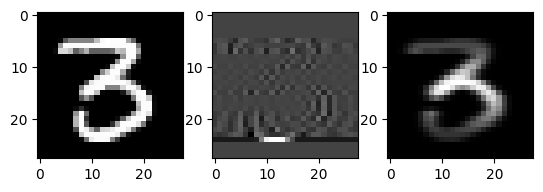

In [9]:
#ideal high pass
def ideal_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = (math.sqrt(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) > t)
  s3 = s2*huv
  s4= np.fft.ifft(s3).real
  s5 = center_img(s4)
  return s5

def gauss_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = np.exp(-2*(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) / math.pow(t,2))
  s3 = s2*huv
  s4 = np.fft.ifft(s3).real
  s5= center_img(s4)
  return s5

g_hp_filter_img = gauss_hp_filter(image, 10)
ideal_hp_filter_img=ideal_hp_filter(image, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_hp_filter_img, cmap='gray')
axis[2].imshow(g_hp_filter_img, cmap='gray')
axis[0].imshow(image, cmap='gray')